In [28]:
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

## Tomografia Computadorizada

#### Funções para a Projeção Ortogonal

In [29]:
def mult(x, y):
    return np.dot(x, y)

In [30]:
def rod(a_, b_, xt_): # função de 1 rodada de projeções
    k_ = 0
    var = [0] * m

    while k_ < m:
        ai = np.array(a_[k_])
        at = np.transpose(ai)
        v1 = (b_[k_] - mult(at, xt_))
        v1 = v1[0]
        v2 = mult(at, ai)
        v2 = v2[0][0]
    
        if k_ == 0:
            proj = xt_ + (v1 / v2) * np.transpose(ai)
            xt_ = np.transpose(proj)
        
        else:
            proj = np.transpose(xt_) + (v1 / v2) * np.transpose(ai)
            xt_ = np.transpose(proj)
            
        var[k_] = proj
        k_ += 1
    return var

In [31]:
def calculate(a_, b_, xt_):    
    #função para rodar as projeções até aproximar resultados consecutivos
    i = 0
    dif = 1

    while dif > 10e-10:
        k = rod(a_, b_, xt_)
        xt_ = k[m-1][0]
        xt = np.transpose(xt_)
        k2 = rod(a_, b_, xt_)
        dif = abs(k[0][0][0] - k2[0][0][0])
        # print(k2[m-1])
        i += 1
    
    all_x = []
    # print(k2[m-1])
    for j in range(n):
        print(f'x{j+1} =', end=' ')
        print(k2[m-1][0][j])
        all_x.append(k2[m-1][0][j])
        
    return np.reshape(all_x, (-1, 1))

#### Função para Criação da Imagem

In [32]:
def create_image(x_list):
    # Abaixo o reescalonamento Min-Max Normalization
    scl = MinMaxScaler(feature_range=(0, 1))
    scl.fit(x_list)
    scaled_x_list = scl.transform(x_list)
    
    # Tranformando a matriz em 3x3
    scaled_x_list = np.reshape(scaled_x_list, (-1, 3))
    print(scaled_x_list)
    
    sns.heatmap(scaled_x_list, vmin=0, vmax=1, cmap="Greys")

### Medidas dos Feixes no detector

In [33]:
b = [13.0, 15.0, 8.0, 14.79, 14.31, 3.81, 18.0, 12.0, 6.0, 10.51, 16.13, 7.04] #matriz b do exercício 3

x0 = np.array([0., 0., 0., 0., 0., 0., 0., 0., 0.]) #ponto inicial antes das projeções - não muda resultado final
xt = np.transpose(x0)

### Método do Centro do Pìxel

#### Matriz obtida pelo Método do Centro do Pixel, aplicado a Figura 6 (feixes de Raios X)
##### 1 - se o i-ésimo feixe passa pelo centro do j-ésimo pixel;
##### 0 - caso contrário

In [34]:
m = 12

n = 9

a = [[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [1.0], [1.0], [1.0]],
     [[0.0], [0.0], [0.0], [1.0], [1.0], [1.0], [0.0], [0.0], [0.0]],
     [[1.0], [1.0], [1.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]],
     
     [[0.0], [0.0], [0.0], [0.0], [0.0], [1.0], [0.0], [1.0], [1.0]],
     [[0.0], [0.0], [1.0], [0.0], [1.0], [0.0], [1.0], [0.0], [0.0]],
     [[1.0], [1.0], [0.0], [1.0], [0.0], [0.0], [0.0], [0.0], [0.0]],
     
     [[0.0], [0.0], [1.0], [0.0], [0.0], [1.0], [0.0], [0.0], [1.0]],
     [[0.0], [1.0], [0.0], [0.0], [1.0], [0.0], [0.0], [1.0], [0.0]],
     [[1.0], [0.0], [0.0], [1.0], [0.0], [0.0], [1.0], [0.0], [0.0]],
     
     [[0.0], [1.0], [1.0], [0.0], [0.0], [1.0], [0.0], [0.0], [0.0]],
     [[1.0], [0.0], [0.0], [0.0], [1.0], [0.0], [0.0], [0.0], [1.0]],
     [[0.0], [0.0], [0.0], [1.0], [0.0], [0.0], [1.0], [1.0], [0.0]]] 

Resultado:

In [35]:
all_x = calculate(a, b, xt)

x1 = 1.3100000003736945
x2 = 0.6133333261584362
x3 = 5.303333350087902
x4 = 2.143333342913005
x5 = 7.49
x6 = 4.593333323753661
x7 = 1.773333316578765
x8 = 3.1233333405082297
x9 = 7.329999999626303


### Imagem Gerada

[[0.10130877 0.         0.68201648]
 [0.22249152 1.         0.57876878]
 [0.16868638 0.36500243 0.97673291]]


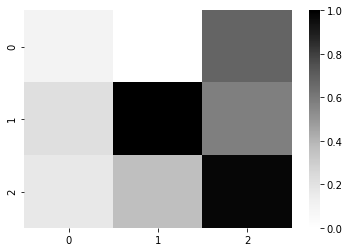

In [36]:
create_image(all_x)

### Método da Reta Central
##### Comprimento da reta central do i-ésimo feixe que fica no j-ésimo pixel / largura do j-ésimo pixel

In [37]:
2*(np.sqrt(2) - 1)

0.8284271247461903

In [38]:
2*(1 - (np.sqrt(2)/2))

0.5857864376269049

In [39]:
m = 12

n = 9

a = [[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [1.0], [1.0], [1.0]],
     [[0.0], [0.0], [0.0], [1.0], [1.0], [1.0], [0.0], [0.0], [0.0]],
     [[1.0], [1.0], [1.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]],
     
     [[0.0], [0.0], [0.0], [0.0], [0.0], [2*(np.sqrt(2) - 1)], [0.0], [2*(np.sqrt(2) - 1)], [2*(1- (np.sqrt(2)/2))]],
     [[0.0], [0.0], [np.sqrt(2)], [0.0], [np.sqrt(2)], [0.0], [np.sqrt(2)], [0.0], [0.0]],
     [[2*(1- (np.sqrt(2)/2))], [2*(np.sqrt(2) - 1)], [0.0], [2*(np.sqrt(2) - 1)], [0.0], [0.0], [0.0], [0.0], [0.0]],
     
     [[0.0], [0.0], [1.0], [0.0], [0.0], [1.0], [0.0], [0.0], [1.0]],
     [[0.0], [1.0], [0.0], [0.0], [1.0], [0.0], [0.0], [1.0], [0.0]],
     [[1.0], [0.0], [0.0], [1.0], [0.0], [0.0], [1.0], [0.0], [0.0]],
     
     [[0.0], [2*(np.sqrt(2) - 1)], [2*(1- (np.sqrt(2)/2))], [0.0], [0.0], [2*(np.sqrt(2) - 1)], [0.0], [0.0], [0.0]],
     [[np.sqrt(2)], [0.0], [0.0], [0.0], [np.sqrt(2)], [0.0], [0.0], [0.0], [np.sqrt(2)]],
     [[0.0], [0.0], [0.0], [2*(np.sqrt(2) - 1)], [0.0], [0.0], [2*(1- (np.sqrt(2)/2))], [2*(np.sqrt(2) - 1)], [0.0]]]

In [40]:
all_x = calculate(a, b, xt)

x1 = 2.0989657917573394
x2 = 1.3988216825280255
x3 = 3.9607546785997756
x4 = 1.559002703816779
x5 = 4.310348216238124
x6 = 8.487194095888341
x7 = 1.786298687373415
x8 = 5.6759251206701435
x9 = 4.996318372543547


### Imagem Gerada

[[0.09877361 0.         0.36142754]
 [0.02259772 0.41074683 1.        ]
 [0.05466375 0.60339711 0.50752084]]


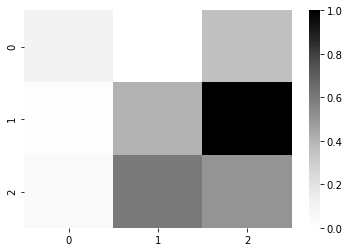

In [41]:
create_image(all_x)

### Método da área

In [42]:
m = 12

n = 9

a = [[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [1.0], [1.0], [1.0]],
     [[0.0], [0.0], [0.0], [1.0], [1.0], [1.0], [0.0], [0.0], [0.0]],
     [[1.0], [1.0], [1.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]],
     
     [[0.0], [0.0], [0.0425], [0.0], [0.0425], [0.75], [0.0425], [0.75], [0.6125]],
     [[0.0], [0.25], [0.915], [0.25], [0.915], [0.25], [0.915], [0.25], [0.0]],
     [[0.6125], [0.75], [0.0425], [0.75], [0.0425], [0.0], [0.0425], [0.0], [0.0]],
     
     [[0.0], [0.0], [1.0], [0.0], [0.0], [1.0], [0.0], [0.0], [1.0]],
     [[0.0], [1.0], [0.0], [0.0], [1.0], [0.0], [0.0], [1.0], [0.0]],
     [[1.0], [0.0], [0.0], [1.0], [0.0], [0.0], [1.0], [0.0], [0.0]],
     
     [[0.0425], [0.75], [0.6125], [0.0], [0.0425], [0.75], [0.0], [0.0], [0.0425]],
     [[0.915], [0.25], [0.0], [0.25], [0.915], [0.25], [0.0], [0.25], [0.915]],
     [[0.0425], [0.0], [0.0], [0.75], [0.0425], [0.0], [0.6125], [0.75], [0.0425]]] 

In [43]:
all_x = calculate(a, b, xt)

x1 = 2.9974775772355478
x2 = 1.001974861222238
x3 = 4.0021066831980185
x4 = 1.007300736414646
x5 = 4.986648885173407
x6 = 9.008179159721546
x7 = 1.9968839418640043
x8 = 6.013298884851567
x9 = 4.991376353088405


[[2.49244541e-01 0.00000000e+00 3.74725864e-01]
 [6.65218497e-04 4.97698269e-01 1.00000000e+00]
 [1.24267261e-01 6.25930071e-01 4.98288745e-01]]


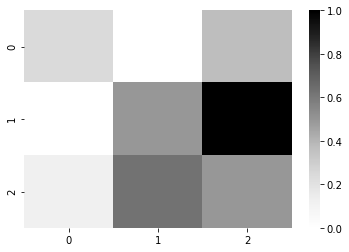

In [44]:
create_image(all_x)

## Esboço de um algorítmo generalizado para o método do centro do pixel

##### conseguimos calcular todos vetores de feixes horizontais e verticais (for 1 e for 2), mas uma fórmula generalizante para as diagonais envolveria o programa saber sobre o tamanho de diversas diagonais, e não conseguimos fazer nada fora a diagonal principal (for 3) e a secundária (for 4) - por isso o número de equações de um quadrado NxN seria 2N + 2, ou seja, o sistema não seria sobredeterminado.

In [45]:
def centro(n):
    r = int(n**0.5) # lado do quadrado
    a = [[]]
    K = 2*r + 2 #tamanho da matriz A 
    a += [[]] * K    
    
    for i in range(r): # for 1 - setas da esquerda pra direita
        lista1 = [[0]]*n
        for j in range(r):
            lista1[i*r + j] = [1]
        a[i] = lista1
        
    for i in range(r): #for 2 - setas de cima pra baixo
        lista3 = [[0]]*(n)
        for j in range(r):
            lista3[i + r*j]=[1]
        a[r + i] = lista3
        
    for i in range(1): # for 3 - setas de esq baixo -> dir cima
        lista2 = [[0]]*n
        for j in range(r):
            lista2[j + j*r] = [1] #comentário 1 *
        a[2*r ] = lista2
            
    # for 4 - setas de esq baixo -> dir cima
    lista4 = [[0]]*n
    for j in range(1,r+1):
        lista4[j*r - j] = [1] # comentário 2
    a[2*r + 1] = lista4
 
    return a

###### Comentários 1 e 2 da função acima: a função é a mesma independente do método, exceto que nas nas linhas das diagonais principais (for 3 e for 4), o método da reta central teria o valor de raíz de 2

###### O método da área é mais complicado pois os feixes das diagonais principais também pegam pixels fora da diagonal princpal em si

##### Usando esse método para o exercício 3, pelo método do centro do pixel, com uma matriz B reduzida, temos:

In [46]:
b = [8, 15, 13, 6, 12, 18, 16.13 , 14.31]
m = 8
n = 9
a = centro(9)

In [47]:
all_x = calculate(a, b, xt)

x1 = 1.6583333336673105
x2 = 1.5933333336892457
x3 = 4.7483333333406454
x4 = 1.9266666670225783
x5 = 7.146666666652043
x6 = 5.926666667022579
x7 = 2.4150000000073124
x8 = 3.260000000355912
x9 = 7.325000000333977


[[0.01134051 0.         0.55045071]
 [0.05815644 0.9688863  0.75603373]
 [0.14335563 0.2907822  1.        ]]


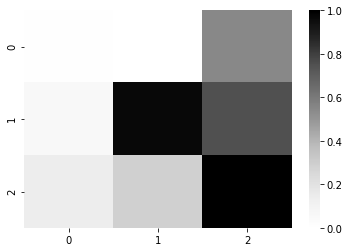

In [48]:
create_image(all_x)

# Esboço do algorítmo generalizado para o método da reta central

In [49]:
def reta_central(n):
    r = int(n**0.5) # lado do quadrado
    a = [[]]
    K = 2*r + 2 #tamanho da matriz A 
    a += [[]] * K    
    
    for i in range(r): # for 1 - setas da esquerda pra direita
        lista1 = [[0]]*n
        for j in range(r):
            lista1[i*r + j] = [1]
        a[i] = lista1
        
    for i in range(r): #for 2 - setas de cima pra baixo
        lista3 = [[0]]*(n)
        for j in range(r):
            lista3[i + r*j]=[1]
        a[r + i] = lista3
        
    for i in range(1): # for 3 - setas de esq baixo -> dir cima
        lista2 = [[0]]*n
        for j in range(r):
            lista2[j + j*r] = [np.sqrt(2)] # ver comentário 1 *
        a[2*r ] = lista2
            
    # for 4 - setas de esq baixo -> dir cima
    lista4 = [[0]]*n
    for j in range(1,r+1):
        lista4[j*r - j] = [np.sqrt(2)] # ver comentário 2
    a[2*r + 1] = lista4
 
    return a

In [52]:
b = [8, 15, 13, 6, 12, 18, 16.13 , 14.31]
m = 8
n = 9
a = reta_central(9)

In [53]:
all_x = calculate(a, b, xt)

x1 = 0.7820944532476889
x2 = 3.0792782629497735
x3 = 4.138627282827193
x4 = 3.412611596283106
x5 = 4.174776806458442
x6 = 7.412611596283107
x7 = 1.8052939494938602
x8 = 4.7459449296164395
x9 = 6.448761119914357


[[0.         0.34645621 0.50622489]
 [0.39672881 0.51167688 1.        ]
 [0.1543167  0.5978192  0.85463419]]


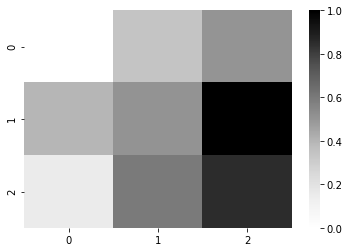

In [54]:
create_image(all_x)